# 6장. 케라스2로 구현하는 AE(오토인코더)
## 6.2 완전 연결 계층을 이용한 AE 구현
필기체 숫자 즉 MNIST를 이용해 AE을 구현

### 6.2.1 완전 연결 계층 AE 모델링
1. AE를 위한 딥러닝 모델을 만듭니다. 

In [2]:
from keras import layers, models

In [3]:
class AE(models.Model):
    def __init__(self, x_nodes=784, z_dim=36):
        x_shape = (x_nodes,)
        x = layers.Input(shape=x_shape)
        z = layers.Dense(z_dim, activation='relu')(x)
        y = layers.Dense(x_nodes, activation='sigmoid')(z)

        super().__init__(x, y)

        self.x = x
        self.z = z
        self.z_dim = z_dim

        # Encoder, Decoder ??

        self.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

    def Encoder(self):
        return models.Model(self.x, self.z)

    def Decoder(self):
        z_shape = (self.z_dim,)
        z = layers.Input(shape=z_shape)
        y_layer = self.layers[-1]
        y = y_layer(z)
        return models.Model(z, y)

### 6.2.2 데이터 준비 
2. 사용할 MNIST 데이터를 케라스의 서브패키지로부터 불러옵니다

In [4]:
from keras.datasets import mnist
import numpy as np
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


### 6.2.3 학습 효과 분석 
3. 학습 효과를 그래프로 분석하기 위해 필요한 함수들과 패키지를 불러옵니다

In [6]:
from keraspp.skeras import plot_loss, plot_acc
import matplotlib.pyplot as plt

### 6.2.4 완전 연결 계층 AE 동작 확인 
4. 완전 연결 계층 AE가 어떻게 동작했는지 확인합시다

In [8]:
def show_ae(autoencoder):
    encoder = autoencoder.Encoder()
    decoder = autoencoder.Decoder()

    encoded_imgs = encoder.predict(X_test)
    decoded_imgs = decoder.predict(encoded_imgs)

    n = 10
    plt.figure(figsize=(20, 6))
    for i in range(n):

        ax = plt.subplot(3, n, i + 1)
        plt.imshow(X_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, i + 1 + n)
        plt.stem(encoded_imgs[i].reshape(-1))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, i + 1 + n + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

### 6.2.5 학습 및 성능 평가 
5. 학습과 성능 평가에 사용할 main() 함수를 만듭니다. 

In [9]:
def main():
    x_nodes = 784
    z_dim = 36

    autoencoder = AE(x_nodes, z_dim)

    history = autoencoder.fit(X_train, X_train,
                              epochs=10,
                              batch_size=256,
                              shuffle=True,
                              validation_data=(X_test, X_test))

    plot_acc(history, 'Accuracy')
    plt.show()
    plot_loss(history, 'Loss')
    plt.show()

    show_ae(autoencoder)
    plt.show()

2021-10-21 21:35:54.001437: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-10-21 21:35:54.054257: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-10-21 21:35:54.054453: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (SJKIM-Home): /proc/driver/nvidia/version does not exist
2021-10-21 21:35:54.056091: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2021-10-21 21:35:54.070529: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 3599995000 Hz
2021-10-21 21:35:54.072769: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55ddcd8c28c0 initialized for platform Host (this does not guarantee that XLA will be used). Devi

Epoch 1/10
235/235 [==============================] - 2s 8ms/step - loss: 0.6957 - accuracy: 0.0011 - val_loss: 0.6957 - val_accuracy: 0.0014
Epoch 2/10
235/235 [==============================] - 2s 8ms/step - loss: 0.6955 - accuracy: 0.0011 - val_loss: 0.6955 - val_accuracy: 0.0015
Epoch 3/10
235/235 [==============================] - 2s 8ms/step - loss: 0.6952 - accuracy: 0.0011 - val_loss: 0.6953 - val_accuracy: 0.0015
Epoch 4/10
235/235 [==============================] - 2s 8ms/step - loss: 0.6950 - accuracy: 0.0011 - val_loss: 0.6950 - val_accuracy: 0.0016
Epoch 5/10
235/235 [==============================] - 2s 8ms/step - loss: 0.6948 - accuracy: 0.0011 - val_loss: 0.6948 - val_accuracy: 0.0015
Epoch 6/10
235/235 [==============================] - 2s 8ms/step - loss: 0.6946 - accuracy: 0.0011 - val_loss: 0.6946 - val_accuracy: 0.0015
Epoch 7/10
235/235 [==============================] - 2s 7ms/step - loss: 0.6944 - accuracy: 0.0011 - val_loss: 0.6944 - val_accuracy: 0.0015
Epoch 

/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sjkim/ana

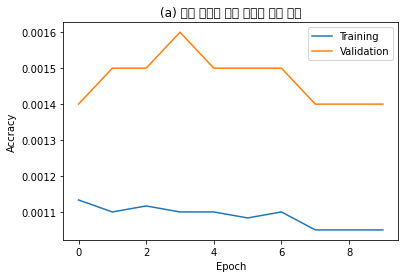

/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/sjkim/anacond

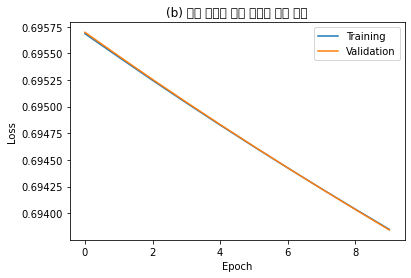

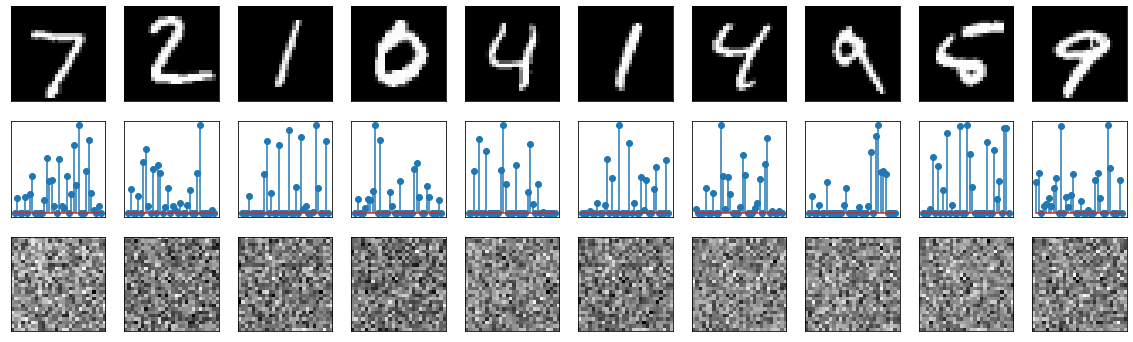

In [10]:
main()

---
### 6.2.6 전체 코드

(60000, 784)
(10000, 784)


2021-10-21 21:47:42.248122: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-10-21 21:47:42.329818: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-10-21 21:47:42.330309: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.455GHz coreCount: 5 deviceMemorySize: 2.00GiB deviceMemoryBandwidth: 104.43GiB/s
2021-10-21 21:47:42.334011: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-10-21 21:47:42.392417: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-10-21 21:47:42.419715: I tensorflow/stream_executor

Epoch 1/10


2021-10-21 21:47:46.051815: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10


235/235 [==============================] - 1s 6ms/step - loss: 0.6939 - accuracy: 8.5000e-04 - val_loss: 0.6938 - val_accuracy: 6.0000e-04
Epoch 2/10
235/235 [==============================] - 1s 6ms/step - loss: 0.6937 - accuracy: 8.8333e-04 - val_loss: 0.6936 - val_accuracy: 6.0000e-04
Epoch 3/10
235/235 [==============================] - 1s 6ms/step - loss: 0.6935 - accuracy: 9.1667e-04 - val_loss: 0.6934 - val_accuracy: 6.0000e-04
Epoch 4/10
235/235 [==============================] - 1s 6ms/step - loss: 0.6933 - accuracy: 9.5000e-04 - val_loss: 0.6933 - val_accuracy: 6.0000e-04
Epoch 5/10
235/235 [==============================] - 1s 6ms/step - loss: 0.6931 - accuracy: 0.0010 - val_loss: 0.6931 - val_accuracy: 6.0000e-04
Epoch 6/10
235/235 [==============================] - 1s 6ms/step - loss: 0.6930 - accuracy: 0.0011 - val_loss: 0.6929 - val_accuracy: 7.0000e-04
Epoch 7/10
235/235 [==============================] - 1s 6ms/step - loss: 0.6928 - accuracy: 0.0011 - val_loss: 0.6927 

/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sjkim/ana

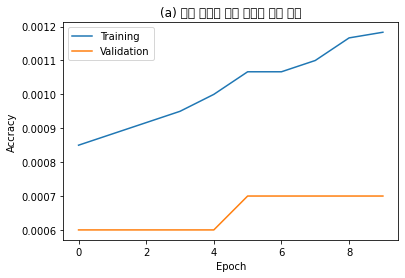

/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/sjkim/anaconda3/envs/keras-gpu/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/sjkim/anacond

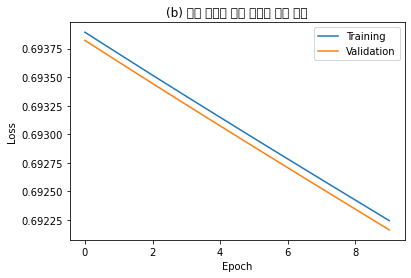

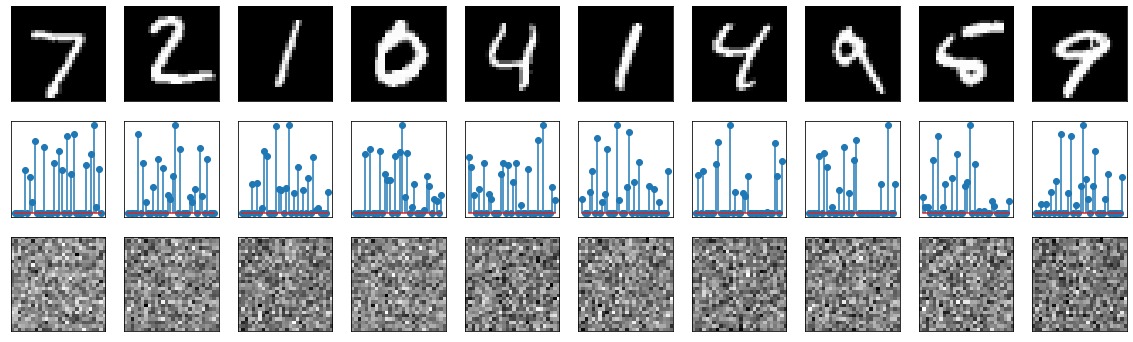

In [1]:
###########################
# AE 모델링
###########################
from keras import layers, models  # (Input, Dense), (Model)

class AE(models.Model):
    def __init__(self, x_nodes=784, z_dim=36):
        x_shape = (x_nodes,)
        x = layers.Input(shape=x_shape)
        z = layers.Dense(z_dim, activation='relu')(x)
        y = layers.Dense(x_nodes, activation='sigmoid')(z)

        super().__init__(x, y)

        self.x = x
        self.z = z
        self.z_dim = z_dim

        # Encoder, Decoder ??

        self.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

    def Encoder(self):
        return models.Model(self.x, self.z)

    def Decoder(self):
        z_shape = (self.z_dim,)
        z = layers.Input(shape=z_shape)
        y_layer = self.layers[-1]
        y = y_layer(z)
        return models.Model(z, y)


###########################
# 데이터 준비
###########################
from keras.datasets import mnist
import numpy as np
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
print(X_train.shape)
print(X_test.shape)


###########################
# 학습 효과 분석
###########################
from keraspp.skeras import plot_loss, plot_acc
import matplotlib.pyplot as plt


###########################
# AE 동작 확인
###########################
def show_ae(autoencoder):
    encoder = autoencoder.Encoder()
    decoder = autoencoder.Decoder()

    encoded_imgs = encoder.predict(X_test)
    decoded_imgs = decoder.predict(encoded_imgs)

    n = 10
    plt.figure(figsize=(20, 6))
    for i in range(n):

        ax = plt.subplot(3, n, i + 1)
        plt.imshow(X_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, i + 1 + n)
        plt.stem(encoded_imgs[i].reshape(-1))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, i + 1 + n + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()


###########################
# 학습
###########################
def main():
    x_nodes = 784
    z_dim = 36

    autoencoder = AE(x_nodes, z_dim)

    history = autoencoder.fit(X_train, X_train,
                              epochs=10,
                              batch_size=256,
                              shuffle=True,
                              validation_data=(X_test, X_test))

    plot_acc(history, '(a) 학습 경과에 따른 정확도 변화 추이')
    plt.show()
    plot_loss(history, '(b) 학습 경과에 따른 손실값 변화 추이')
    plt.show()

    show_ae(autoencoder)
    plt.show()

main()